In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sign_mnist_train.csv")

In [4]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
df.shape

(27455, 785)

In [36]:
X = df.iloc[:, 1:]
y = df["label"]

In [37]:
sorted(y.unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

As explained in the explanation : 0 = A, 25 should be equal to Z. However, J (9) and Z are missing because we need to move to sign them.

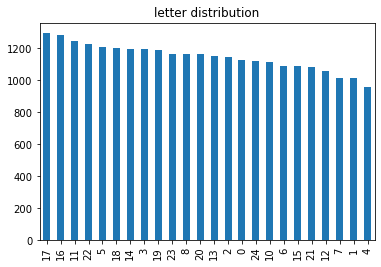

In [38]:
y.value_counts().plot(kind = "bar", title = "letter distribution")
plt.show()

Between around 1000 & 1300 value of each in the dataset

In [45]:
def get_index():
    n = 0
    i = 0
    ordered_numbers = []
    for number in y:
        if int(number) == n:
            ordered_numbers.append(i)
            n += 1
        if n == 9 or n == 25:
            n += 1
        if n == len(df["label"].unique()):
            return ordered_numbers
        i += 1

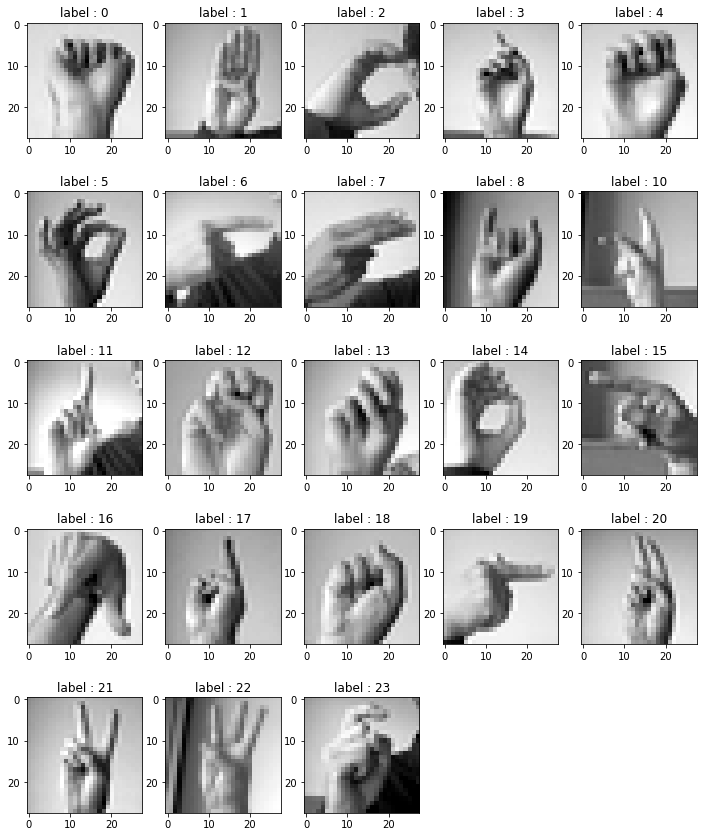

In [82]:
def get_image(sample_index):
    fig=plt.figure(figsize=(12, 15))
    columns = 5
    rows = 5
    a=np.random.rand(2,3)
    for i in range(1, 24):
        fig.add_subplot(rows, columns, i)
        i = i-1
        pixels = np.array(X.loc[sample_index[i]])
        pixels = pixels.reshape((28, 28))
        if i >= 9:
            i = i+1
        plt.title("label : {}".format(i))
        plt.imshow(pixels, cmap='gray')
    plt.show()


def show_images():
    image_index = get_index()
    get_image(image_index)

show_images()

In [84]:
df_test = pd.read_csv("sign_mnist_test.csv")

In [85]:
y_test = df_test["label"]
X_test = df_test.iloc[:, 1:]

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
clf = RandomForestClassifier()

clf.fit(X, y)

y_pred=clf.predict(X_test)

In [88]:
from sklearn import metrics

In [89]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8096765197992192


In [90]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       331
           1       0.98      0.93      0.95       432
           2       0.92      0.99      0.96       310
           3       0.88      0.96      0.92       245
           4       0.90      0.93      0.91       498
           5       0.93      0.91      0.92       247
           6       0.93      0.85      0.89       348
           7       0.99      0.93      0.96       436
           8       0.86      0.77      0.82       288
          10       0.74      0.66      0.70       331
          11       0.83      1.00      0.90       209
          12       0.86      0.70      0.77       394
          13       0.83      0.54      0.66       291
          14       0.96      0.84      0.90       246
          15       0.95      1.00      0.97       347
          16       0.94      0.99      0.96       164
          17       0.24      0.55      0.34       144
          18       0.55    

Very inequal F1 score, for some label, very good score, for some others, very bad.